In [7]:
main()

TypeError: '(slice(None, None, None), 0)' is an invalid key

    X1   X2
0  5.9  3.2
1  4.6  2.9
2  6.2  2.8
3  4.7  3.2
4  5.5  4.2
0    5.9
1    4.6
2    6.2
3    4.7
4    5.5
5    5.0
6    4.9
7    6.7
8    5.1
9    6.0
Name: X1, dtype: float64
[[5.9 3.2]
 [4.6 2.9]
 [6.2 2.8]
 [4.7 3.2]
 [5.5 4.2]
 [5.  3. ]
 [4.9 3.1]
 [6.7 3.1]
 [5.1 3.8]
 [6.  3. ]]
[0.29999981 0.86023248 0.63245553]
[1.62788188 2.15406585 1.90262976]
[0.40000005 0.98488579 0.36055513]
[1.49999981 1.96468819 1.81107703]
[1.22065541 1.20830449 1.56204994]
[1.21655233 1.74642485 1.5       ]
[1.30384029 1.80277556 1.60312195]
[0.50990215 0.60827632 0.2236068 ]
[1.25299622 1.50332954 1.61245155]
[0.28284261 0.92195442 0.5       ]
Cluster    [0. 0. 2. 0. 1. 0. 0. 2. 0. 0.]
points   [array([5.9, 3.2]), array([4.6, 2.9]), array([4.7, 3.2]), array([5., 3.]), array([4.9, 3.1]), array([5.1, 3.8]), array([6., 3.])]
points   [array([5.5, 4.2])]
points   [array([6.2, 2.8]), array([6.7, 3.1])]
 Centre of the clusters after  1  Iteration 
 [[5.1714287 3.1714287]
 [5.5       4.2      ]
 

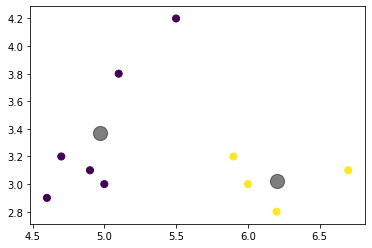

In [18]:
import numpy as np
import pandas as pd
from copy import deepcopy
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


def euclidean(a,b, ax=1):
    return np.linalg.norm(a-b, axis=ax)


def main():
    k = 3
    X = pd.read_csv('kmeans.csv',index_col=False)
    print(X.head())
    kmeans = KMeans(n_clusters=2)
    kmeans.fit(X)
    y_kmeans = kmeans.predict(X)
    print(X.iloc[:,0])
    plt.scatter(X.iloc[:,0], X.iloc[:,1], c=y_kmeans, s=50, cmap='viridis')

    centers = kmeans.cluster_centers_
    plt.scatter(centers[:,0], centers[:, 1], c='black', s=200, alpha=0.5);


    x1 = X['X1'].values
    x2 = X['X2'].values
    X = np.array(list(zip(x1, x2)))
    print(X)
    C_x = [6.2, 6.6 ,6.5]
    C_y = [3.2, 3.7, 3.0]
    Centroid = np.array(list(zip(C_x, C_y)), dtype=np.float32)
    #print("Initial Centroids")
    #print(Centroid.shape)

    Centroid_old = np.zeros(Centroid.shape)
    #print(Centroid_old)
    # Cluster Lables(0, 1, 2)
    clusters = np.zeros(len(X))
    #print(clusters)
    error = euclidean(Centroid, Centroid_old, None)
    #print(error)
    iterr = 0
    # Loop will run till the error becomes zero
    while error != 0:
        # Assigning each value to its closest cluster
        iterr = iterr + 1
        for i in range(len(X)):
            #print(X[i])
            distances = euclidean(X[i], Centroid)
            print(distances)
            cluster = np.argmin(distances)
            #print(cluster)
            clusters[i] = cluster
        print("Cluster   ", clusters)    
        Centroid_old = deepcopy(Centroid)
        
        # Finding the new centroids by taking the Mean
        for p in range(k):
            points = [X[j] for j in range(len(X)) if clusters[j] == p]
            print("points  ",points)
            Centroid[p] = np.mean(points, axis=0)
        print(" Centre of the clusters after ", iterr," Iteration \n", Centroid)
        error = euclidean(Centroid, Centroid_old, None)
        print("Error  ... ",error)  
    

if __name__ == "__main__": 
    main()

